In [138]:
import os
import time
import numpy as np
import pandas as pd

from skimage import io

import matplotlib.pyplot as plt

from CellSeg.segmentation import Segmentation
from CellSeg.analysis import cell_analysis, edge_analysis, face_analysis
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [160]:
path = "/mnt/sda1/For Sophie/Skinner_Jorn_colab/48 hpf 2/"
seg_filename = "ResliceofC1-Process_230713-MMS-Lyn-GFP_H2A-BFP-wt_03_denoised_cp_masks-sizeFilt.tif_myotome_2.tif-1-edited.tif"
pixel_size = dict(x_size = 0.1071804,
                  y_size = 0.1071804,
                  z_size = 0.5,)

# pixel_size = dict(x_size = 0.183,
#                   y_size = 0.183,
#                   z_size = 0.5,)

In [161]:

image = io.imread(os.path.join(path, seg_filename))
seg = Segmentation(image, pixel_size, path)

In [162]:
%%snakeviz
start_time = time.time()
seg.perform_prerequisite()

 
*** Profile stats marshalled to file '/tmp/tmpp_9ge170'.
Embedding SnakeViz in this document...
<function display at 0x7f93015e82c0>


In [163]:
%%snakeviz
start_time = time.time()
seg.cell_segmentation_simplified()
# print("--- %s seconds ---" % (time.time() - start_time))

 
*** Profile stats marshalled to file '/tmp/tmp2oqk7c6q'.
Embedding SnakeViz in this document...
<function display at 0x7f93015e82c0>


In [164]:
cell_simple_df = pd.read_csv(os.path.join(path,"cell_simple_df.csv"), index_col="Unnamed: 0")


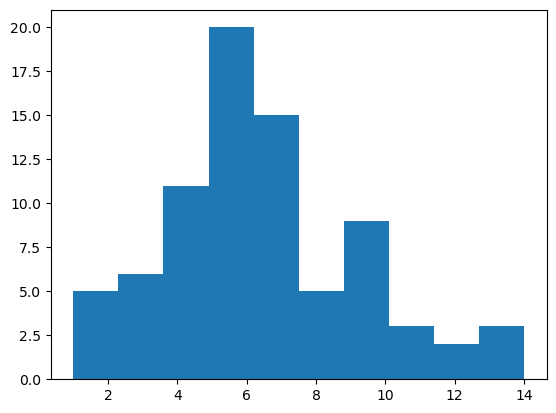

In [165]:
_=plt.hist(cell_simple_df["nb_neighbor"])

In [167]:
cell_simple_df = pd.read_csv("/mnt/sda1/For Sophie/Skinner_Jorn_colab/48 hpf 2/cell_simple_df.csv", index_col="Unnamed: 0")
id_cells = pd.read_csv("/mnt/sda1/For Sophie/Skinner_Jorn_colab/48 hpf 2/nuclei_position_sorted.csv", )
# id_cells = pd.read_csv("/mnt/sda1/For Sophie/Skinner_Jorn_colab/48 hpf 2/id_cells.csv", )

In [50]:
# remove line with 0 value in id_cell and corresponding nuclei in id_nuclei.csv
id_nuclei_to_remove = id_cells[id_cells["id_cell"]==0][" "].to_numpy()
id_cells.drop(index=id_cells[id_cells["id_cell"]==0].index, inplace=True)
id_cells.sort_values("id_cell", inplace=True)
id_nuclei.drop(index=id_nuclei[id_nuclei["id_nuclei"].isin(id_nuclei_to_remove)].index, inplace=True)
id_nuclei.sort_values("id_nuclei", inplace=True)

In [51]:
# Keep only segmented cells in one myotome
id_cells = id_cells[id_cells["id_cell"].isin(cell_simple_df['id_im'].to_numpy())]
id_nuclei = id_nuclei[id_nuclei["id_nuclei"].isin(id_cells[" "])]

In [174]:
# remove cells if they don't have nuclei
cells_without_nuclei = list(set(np.unique(cell_simple_df['id_im']))-set(np.unique(id_cells["id_im"])))
cell_simple_df.drop(index=cell_simple_df[cell_simple_df['id_im'].isin(cells_without_nuclei)].index, inplace=True)
for i in range(len(cell_simple_df)):
    for c in cells_without_nuclei:
        if str(c) in cell_simple_df['ids_neighbor'].iloc[i].split(";"):
            print(str(c) + '\t'+ str(i))
            cell_simple_df.iloc[i,-1] = cell_simple_df.iloc[i]['ids_neighbor'].replace(str(c)+';','')
            cell_simple_df.iloc[i,-2] = cell_simple_df.iloc[i]["nb_neighbor"]-1

69	0
122	1
2	3
207	4
5	5
69	5
41	5
173	5
93	5
58	9
29	9
77	10
58	10
29	10
2	11
5	14
199	14
41	14
173	14
207	14
69	15
58	16
29	16
241	17
93	17
41	18
93	18
85	18
77	19
29	19
203	21
2	23
5	25
41	25
203	26
29	27
199	29
41	29
173	29
207	29
93	29
41	30
201	30
173	30
93	30
203	31
241	32
203	34
77	34
141	34
122	37
201	37
77	37
205	37
201	38
77	38
205	38
201	39
77	42
205	42
58	42
203	44
207	50
69	53
2	58
2	59
207	59
122	60


In [176]:
# id_cells.to_csv("/mnt/sda1/For Shopie/id_cells_correct.csv")
# id_nuclei.to_csv("/mnt/sda1/For Shopie/id_nuclei_correct.csv")
cell_simple_df.to_csv("/mnt/sda1/For Sophie/Skinner_Jorn_colab/48 hpf 2/cell_simple_df_sorted.csv")

In [169]:
cell_simple_df

,id_im,nb_neighbor,ids_neighbor
0,2,5,239;23;50;102;240;
1,5,5,241;107;62;41;32;
2,8,7,214;210;52;63;69;32;132;
3,10,4,63;50;122;149;
4,21,4,50;208;110;63;
...,...,...,...
74,238,1,149;
75,239,6,208;2;240;24;50;102;
76,240,13,208;107;207;62;239;24;110;2;253;91;102;50;122;
77,241,7,72;93;32;107;5;124;41;


In [173]:
np.unique(id_cells["id_im"], return_counts=True)

(array([  8,  10,  21,  23,  24,  32,  36,  39,  43,  45,  49,  50,  52,
         54,  62,  63,  65,  72,  84,  89,  91,  95,  96, 102, 106, 107,
        108, 110, 115, 117, 120, 121, 124, 132, 142, 144, 146, 149, 151,
        152, 156, 157, 164, 166, 167, 171, 179, 182, 183, 195, 208, 210,
        212, 214, 229, 232, 234, 238, 239, 240, 253]),
 array([2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 1, 1,
        2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
        4, 1, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1]))